![Title](Images/cisco.png)

## Internet Traffic Data Linear Regression 

### Objectives
In this lab, you will become familiar with the concepts of regression and prediction and the concept of working with data.
<li>**Part 1: Import the Libraries  **</li>
<li>**Part 2: Visualize the Historical Data **</li>
<li>**Part 3: Create a Simple Linear Regression Model: First Order Polynomial **</li>
<li>**Part 4: Create a Linear Regression Model: Higher Order Polynomials **</li>
<li>**Part 5: Calculate the Errors**</li>
<li>**Part 6: Create a Non-Linear Regression Model: Exponential Growth **</li>
<li>**Part 7: Compare the Models**</li>
### Scenario / Background
In this lab, you will learn how to use Python libraries to fit regression models to data.
In particular, you will look at historical data about the growth of global Internet traffic, and use this data to predict its volume in the year 2020.
### Required Resources
* 1 PC with Internet access
* Python libraries: `pandas`, `numpy`, `sqlite3`, `matplotlib`, `folium_utils`
* Datafiles: Internet_traffic_hist.csv, Internet_traffic_proj.csv

## Part 1:  Import the Libraries
In this part, you will install and import all the libraries necessary to complete this lab.
#### Step 1: Install the of scikit-learn library.
Thi installation will take a few minutes.

In [ ]:
# Code cell 1
!pip install scikit-learn

#### Step 2: Import the rest of  the libraries.
- pandas
- numpy
- pyplot (and use the style fivethirtyeight, or another one if you prefer)

In [1]:
# Code cell 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

`sklearn` is one of the most used Python libraries for Machine Learning. It implements a wide variety of methods, and offers functionalities for pre-processing, cross validation, etc. You can find documentation, tutorials, and more here: http://scikit-learn.org/stable/documentation.html

In [2]:
# Code cell 3
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

## Part 2: Visualize the Historical Data
#### Step 1: Load  historical Internet traffic data.

Load the dataset `internet_traffic_hist.csv`, into a `pandas` `DataFrame`, and visualize the first few rows.

In [3]:
# Code cell 4
filename = './Data/internet_traffic_hist.csv'
df_hist = pd.read_csv(filename)
df_hist.head()

,traffic,year
0,100.000000,2005
1,126.933755,2006
2,160.303757,2007
3,203.390603,2008
4,241.292566,2009


#### Step 2: Visualize the internet volume traffic.
According to the  [Cisco VNI Forecast](http://www.cisco.com/c/en/us/solutions/collateral/service-provider/visual-networking-index-vni/complete-white-paper-c11-481360.html), consumer fixed Internet traffic will grow 22% per year from 2015 until 2020. For this lab, the assumption is that the growth rate was the same for the period 2005-2015. Under this assumption, the value of Internet traffic for 2005 is fixed to 100. The `DataFrame` `df_hist` contains the evolution of fixed Internet traffic volume until 2015 (plus or minus some year-by-year variation).

Using the `matplotlib` functions learned so far, visualize the traffic volume evolution year by year.

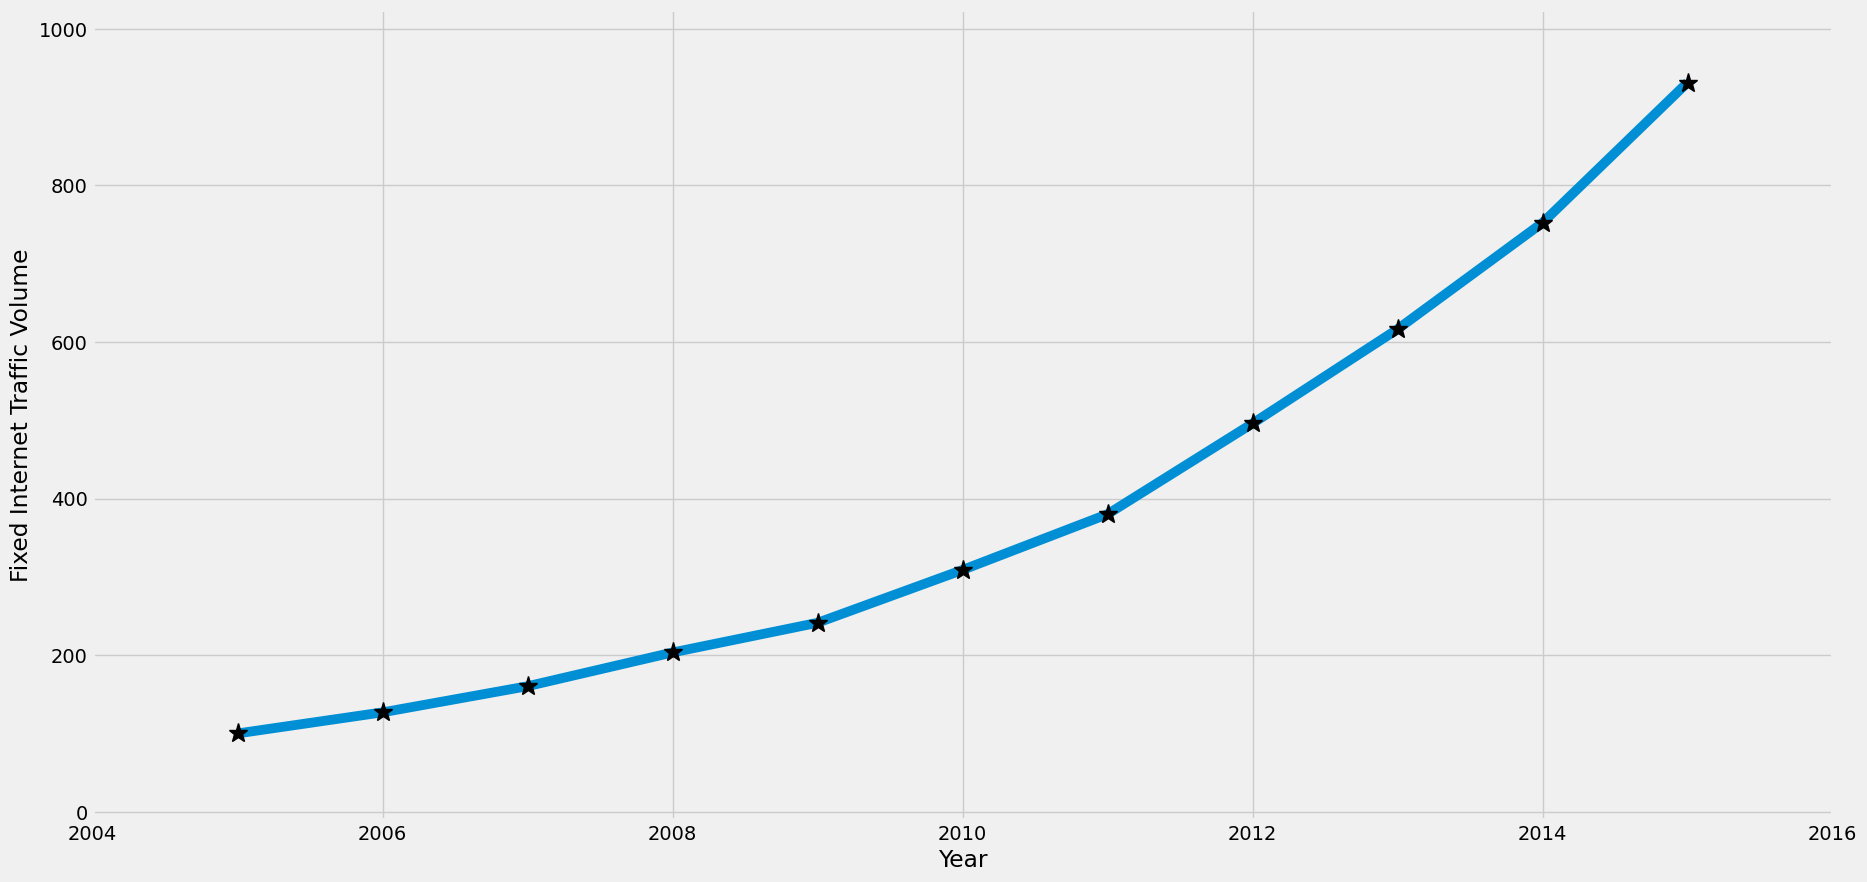

In [4]:
# Code cell 5
# Create a slightly bigger figure use all the available space
plt.figure(figsize = (20,10))

# XY Plot of year and traffic
x = df_hist.year
y = df_hist.traffic

# XY Plot of year and traffic
plt.plot(x, y, label =' ', linewidth = 7)
plt.plot(x, y,'*k', markersize = 14, label = '')

#Increase sligthly the axis sizes to make the plot more clear
plt.axis([x.iloc[0]-1, x.iloc[-1]+1, y.iloc[0]*-0.1,  y.iloc[-1]*1.1])

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')

# Increase default font size
plt.rcParams.update({'font.size': 26})
plt.show()

## Part 3: Simple Linear Regression: First Order Polynomial

For a Data Analyst, a regression task can be seen a two step decision process:

- First, **choose the regression model** (or the family of models) to be used to capture the mathematical relationship between the observed variables,


- Second, **fitting** the given model to the data, *i.e.* choosing a metric for evaluating the  *quality of fit* of a model, and computing the values of the parameters that maximize such a metric.

The choice of the family of models to fit is the first fundamental step in regression.

In the first step, the *tradeoff* is between a simpler model, whose parameters are easy to compute but might not satisfactorily fit the data, and a more complex one, which might obtain a higher quality of fit but requires more computations to estimate the optimal parameters.

When the model family is decided, the second step also involves a *tradeoff*: the so called *bias-variance tradeoff*, which is determined by the choice of the evaluation metric.
Skipping the mathematical details, the idea is that even for the chosen model, it is still possible to fine-tune the parameters to either increase the quality of fit inside the range of the observed data or to better generalize outside of it.

In the rest of this lab, you will see examples of how the choices made in the first and the second step result in different solutions for these tradeoffs.
The goal of regression analysis is to model a relationship between two quantitative variables. A general polynomial regression model is in the form of:

$$ y = a_0 + a_1  x  + a_2  x ^ 2 +... + a_n  x ^ n $$

where `n` is the order of power.

To understand this regression model, we will start with the simple linear regression model where the variable n will be set to 1.

The model becomes:

$$ y = a_0 + a_1  x $$
 
A linear model is a model whose parameters have a linear relationship with the variables.

This model is in the same form as a linear equation:

$$ y = m x + b $$

where `m` is the slope of line and `b` is y-intercept.

Given the regression model family, **the mean squared error** (or MSE) as a quality of fit metric. The idea is that we want our polynomial function to fit our data *as close as possible*.

#### Step 1: Overlay a simple linear regression model over the Internet historical data.

In Python, the function `polyfit` is used from the numpy library to fit a polynomial regression model of any order and find the parameters that minimize the MSE.

For the first regression exercise, you will use the family of **polynomial models** with the order of 1, in which the internet traffic variable is $y$ and the year is $x$.

The slope of line is 79.52710966244517.
The y intercept is -159457.1226583395.
The best fit simple linear regression line is 79.52710966244517x + -159457.1226583395.


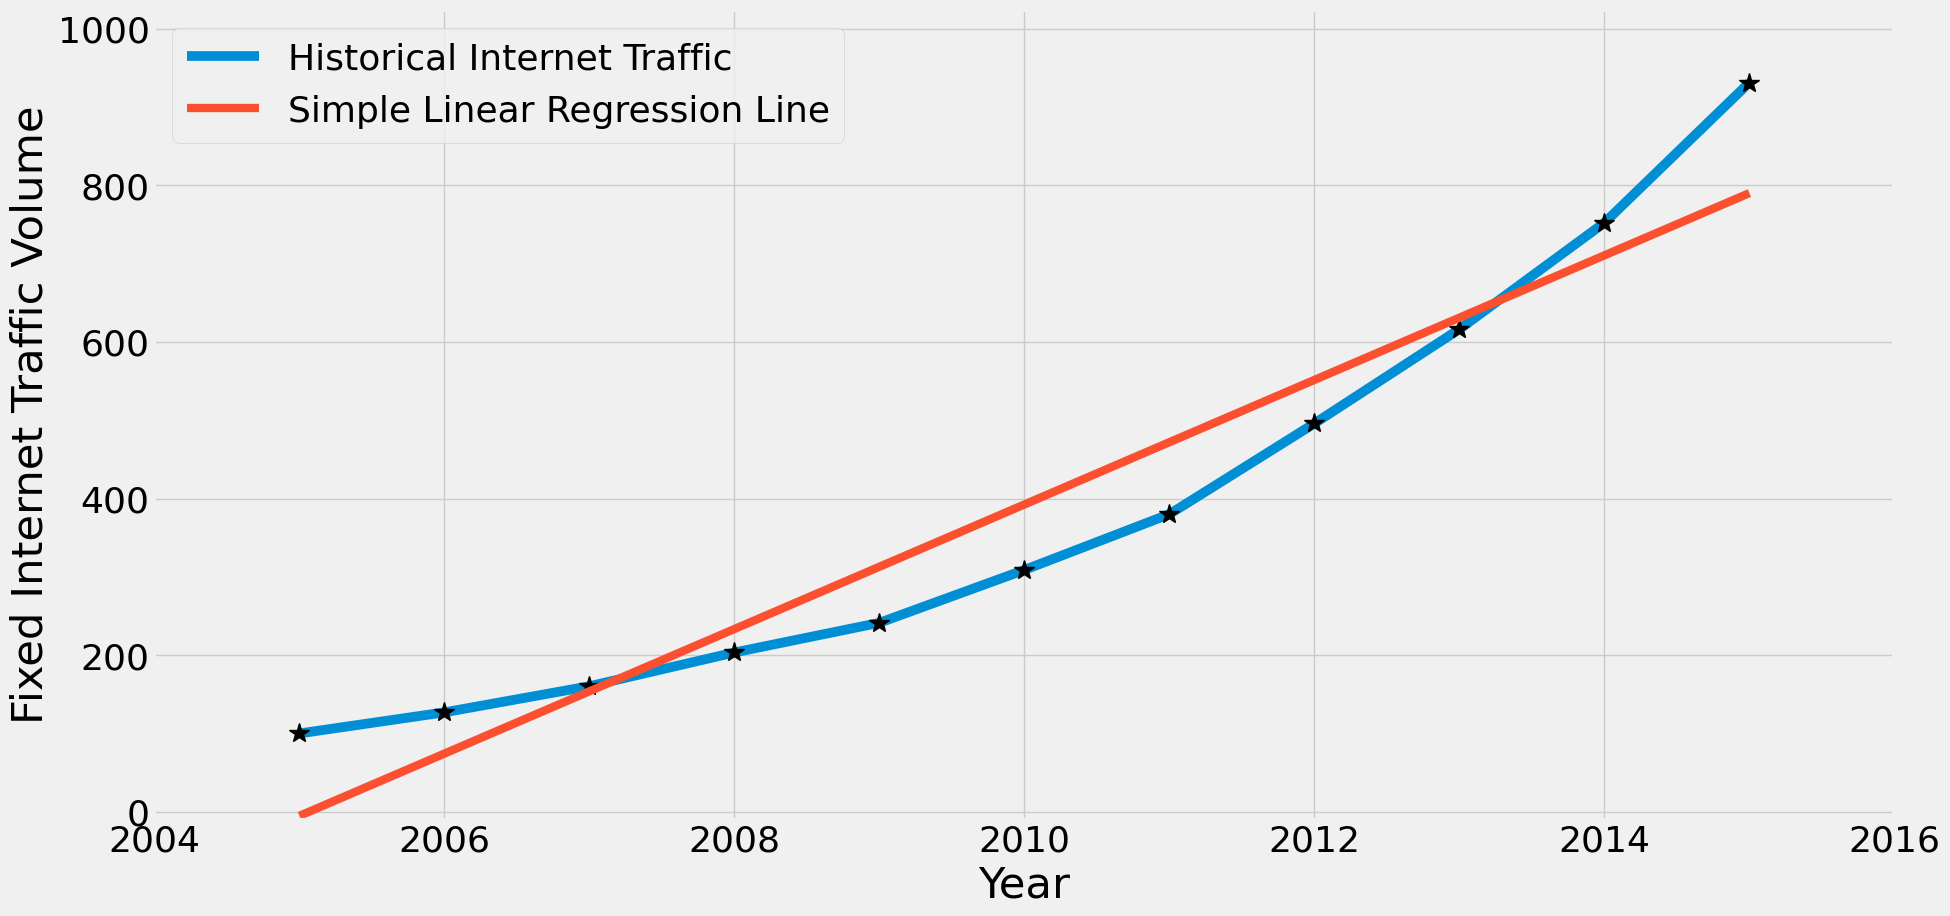

In [9]:
# Code cell 6
# Create a slightly bigger figure use all the available space
plt.figure(figsize = (20,10))

order = 1

# XY Plot of year and traffic
x = df_hist.year
y = df_hist.traffic

m, b = np.polyfit(x,y,order)

plt.plot(x, y, label = 'Historical Internet Traffic', linewidth = 7)
plt.plot(x, y,'*k', markersize = 15, label ='')
plt.plot(x, m*x + b, '-', label = 'Simple Linear Regression Line', linewidth = 6)

print ('The slope of line is {}.'.format(m))
print ('The y intercept is {}.'.format(b))
print ('The best fit simple linear regression line is {}x + {}.'.format(m,b))


#Increase sligthly the axis sizes to make the plot more clear
plt.axis([x.iloc[0]-1, x.iloc[-1]+1, y.iloc[0]*-0.1, y.iloc[-1]*1.1])

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')
plt.legend(loc = 'upper left')


# Increase default font size
plt.rcParams.update({'font.size': 26})
plt.show()

## Part 4: Linear Regression: Higher Order Polynomials
The simple linear regression plot shows that the simple regression linear model is not a suitable model to project the Internet traffic in 2020. 

You will fit a second and third order polynomial regression model to the Internet historical traffic data and store the errors and the MSE for each model in a list. It will be used to compare regression models later in the lab.

A formula for the second order:

$$ y = a_0 + a_1  x  + a_2  x ^ 2  $$

A formula for the third order:

$$ y = a_0 + a_1  x  + a_2  x ^ 2 + a_3  x ^ 3 $$

You will plot polynomial models with increasing order from 1 to 3 and observe the fit of the models. The polynomial with an order of 1 is already plotted in the previous part. 

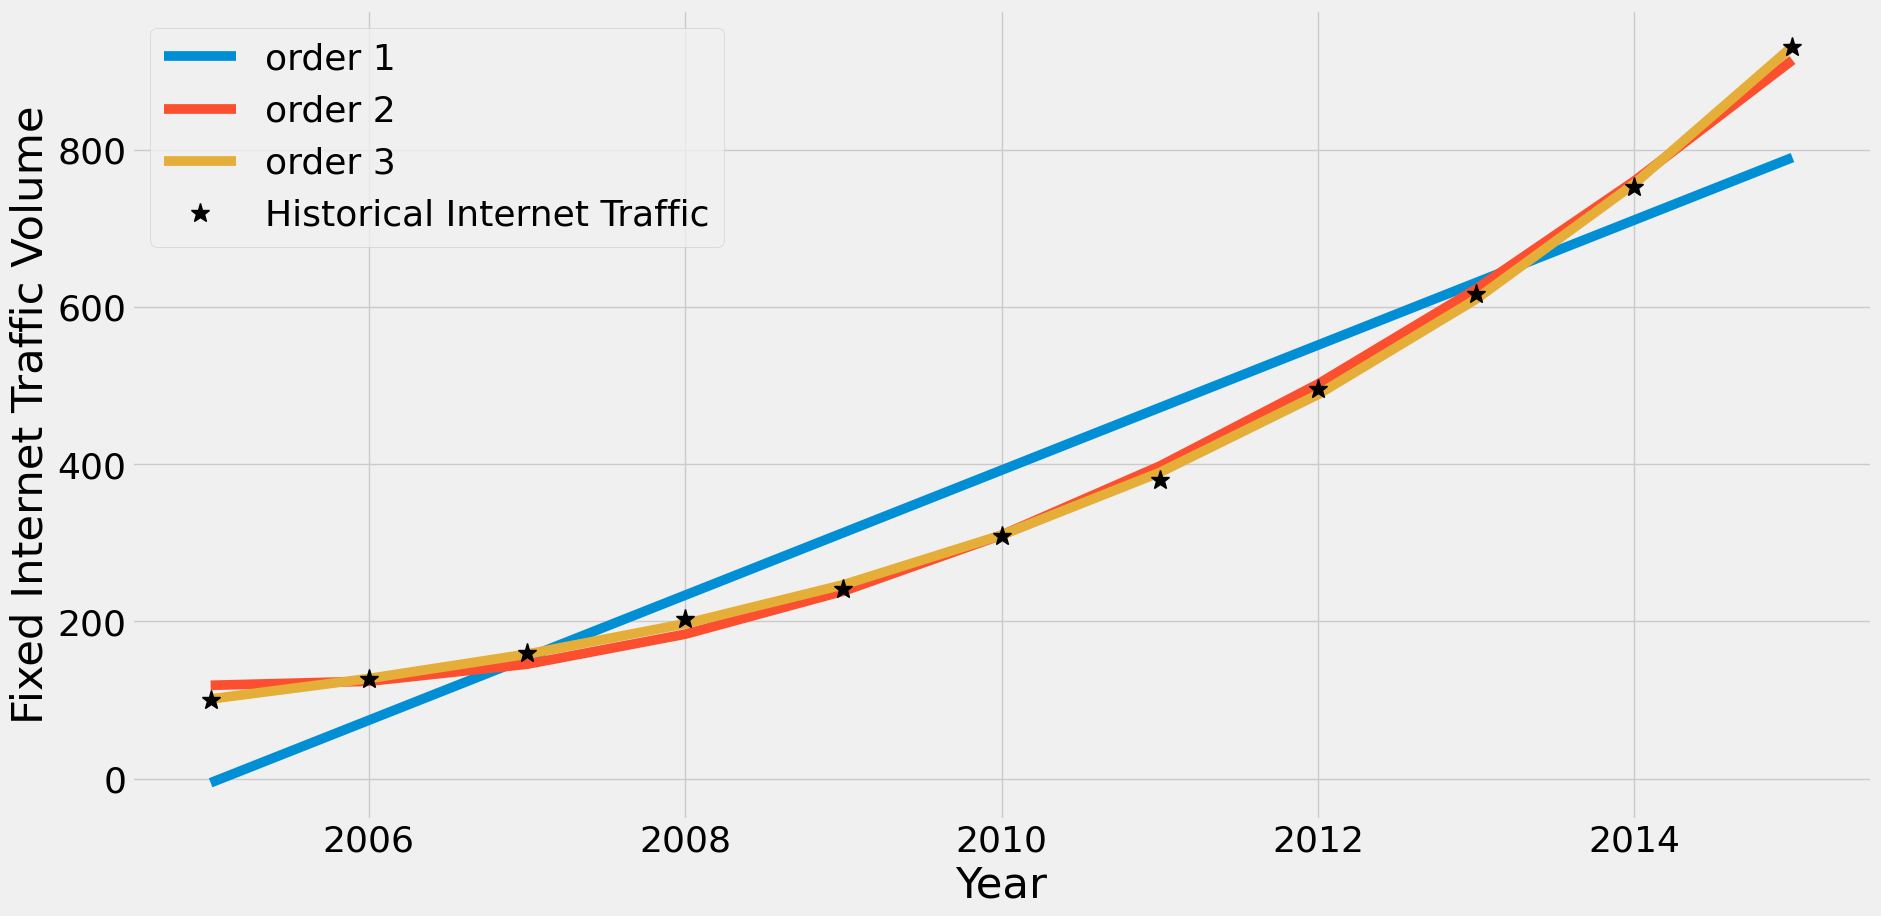

In [10]:
# Code cell 7
models = []       # to store polynomial model parameters (list of poly1d objects)
errors_hist = []  # to store the absolute errors for each point (2005-2015) and for each model (list of numpy arrays )
mse_hist = []     # to store the MSE for each model (list of numpy floats)

#Try polynomial models with increasing order
for order in range(1,4):
    # Fit polynomial model
    p = (np.poly1d(np.polyfit(x, y, order)))
    models.append(p)
    
plt.figure(figsize = (20,10))

# Visualize polynomial models fit
for model in models[0:3]:
    plt.plot(x, model(x), label = 'order ' + str(len(model)), linewidth = 7)

plt.plot(x, y, '*k', markersize = 14, label = 'Historical Internet Traffic', linewidth = 7)
plt.legend(loc = 'upper left')

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')

plt.show()

## Part 5: Calculating the Errors
Compare the errors and visualize the fit for the different regression models by errors.

Given the regression model family, **the mean squared error** (or MSE) as a quality of fit metric. The idea is that we want our polynomial function to fit our data *as close as possible*.

In [11]:
# Code cell 8
# Calculate and store the erros
models = []       # to store polynomial model parameters (list of poly1d objects)
errors_hist = []  # to store the absolute errors for each point (2005-2015) and for each model (list of numpy arrays )
mse_hist = []     # to store the MSE for each model (list of numpy floats)

#Try polynomial models with increasing order
for order in range(1,4):
    # Fit polynomial model
    p = (np.poly1d(np.polyfit(x, y, order)))
    models.append(p)
    
    e = np.abs(y-p(x))        # absolute error
    mse = np.sum(e**2)/len(df_hist) # mse
    
    errors_hist.append(e)   #Store the absolute errors
    mse_hist.append(mse) # Store the mse


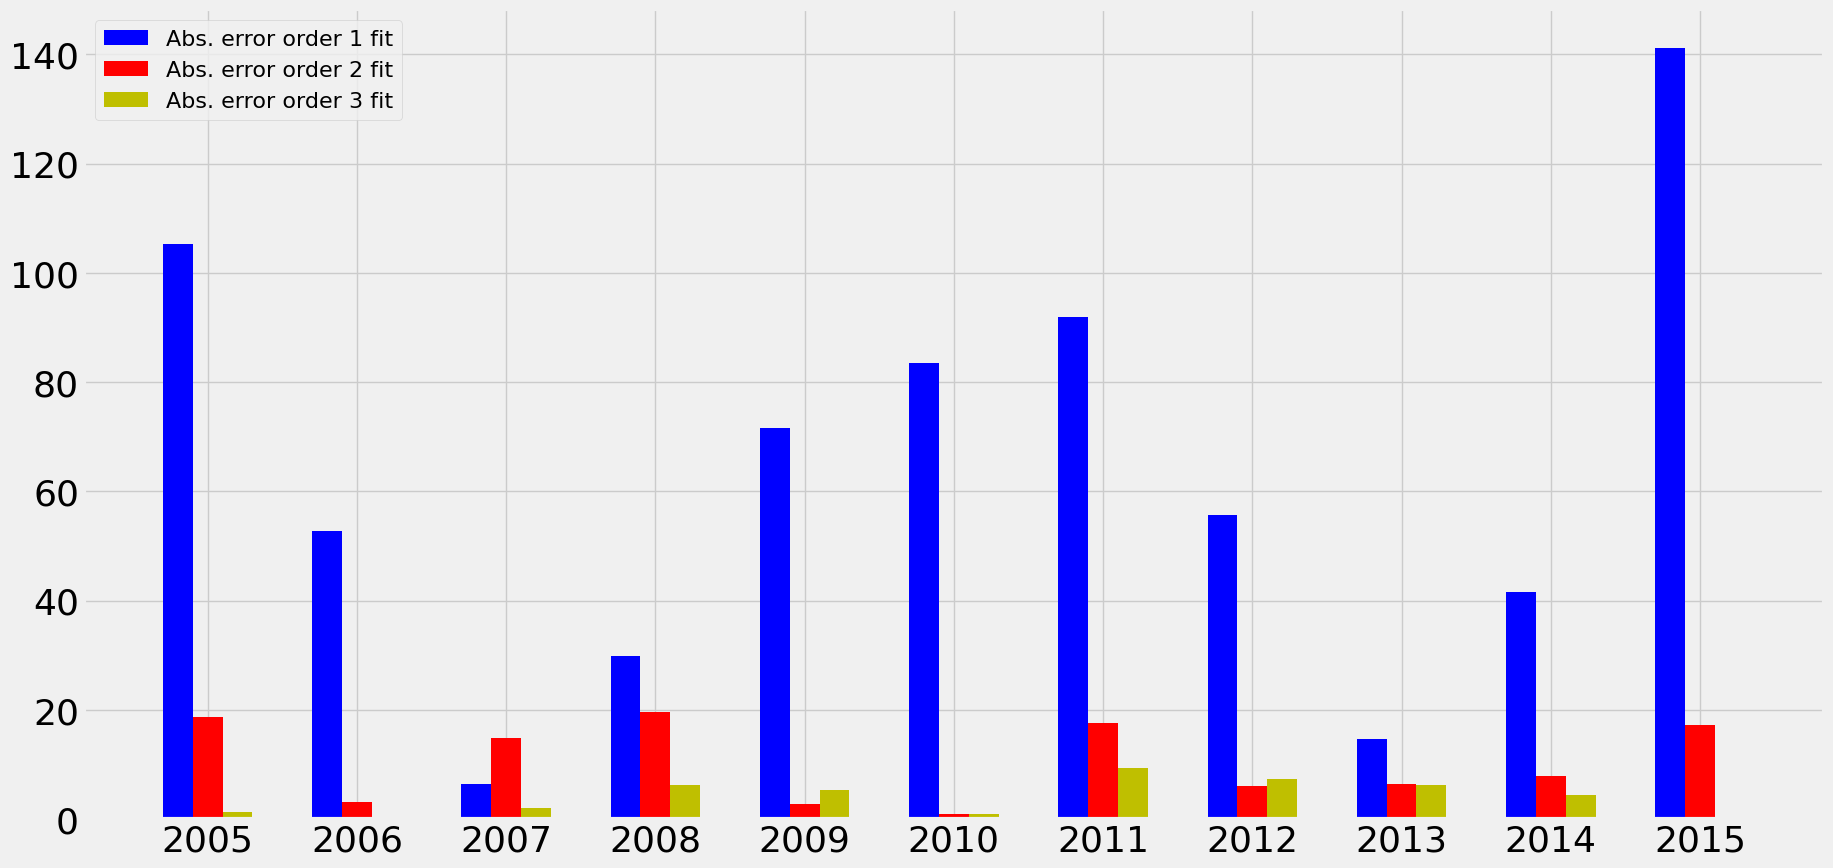

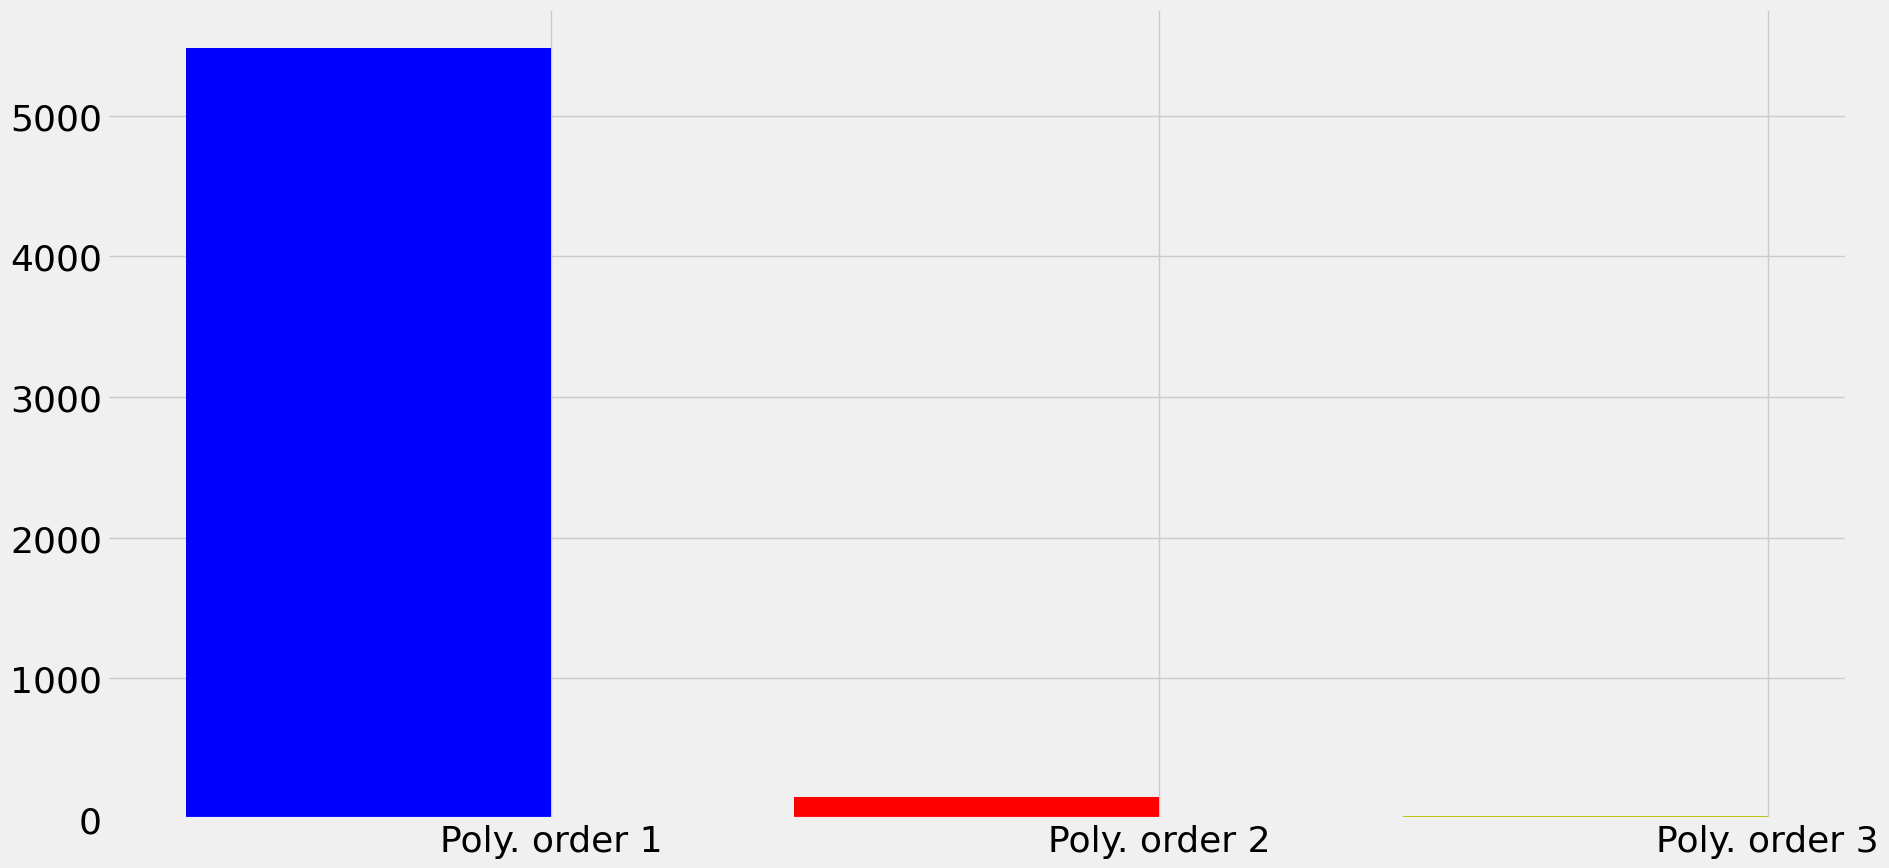

In [25]:
# Code cell 9
# Visualize fit error for each year

x = df_hist.year
width = 0.2   #size of the bar

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

p1 = ax.bar( x, errors_hist[0], width, color = 'b', label = 'Abs. error order 1 fit')
p2 = ax.bar( x + width, errors_hist[1], width, color = 'r', label = 'Abs. error order 2 fit')
p3 = ax.bar( x + 2*width, errors_hist[2], width, color = 'y', label = 'Abs. error order 3 fit')

# "Prettyfy" the bar graph
ax.set_xticks(x+width)
ax.set_xticklabels(x)
plt.legend(loc = 'upper left', fontsize =16)
plt.show()

#Visualise MSE for each model
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

x = np.array([0,1,2])
width = .6   #size of the bar

p1 = ax.bar( x[0], mse_hist[0], width, color = 'b', label = 'pred. error order 1 fit')
p2 = ax.bar( x[1], mse_hist[1], width, color = 'r', label = 'pred. error order 2 fit')
p3 = ax.bar( x[2], mse_hist[2], width, color = 'y', label = 'pred. error order 3 fit')

ax.set_xticks(x+width/2)
ax.set_xticklabels(['Poly. order 1', 'Poly. order 2', 'Poly. order 3'], rotation=0)
plt.show()

From the plot above, it appears that the third polynomial order has the least amount of errors, and the error between the 2nd and 3rd orders is negligible. This suggests that the third polynomial is the best fit for the orders used in this lab at this time.

To determine the parameters for this equation:

$$ y = a_3 x ^ 3 + a_2  x ^ 2  + a_1  x  + a_0 $$

the Python function `polyfit` from the `numpy` library can fit a polynomial regression model of any order and find the parameters that minimize the MSE. The order is set to 3 in the code cell below.

In [28]:
# Code cell 10
# Polynomial function order
order = 3

x = df_hist.year.values      # regressor
y = df_hist.traffic.values   # regressand

# Fit the model, return the polynomial parameter values in a numpy array such that
y = p[0]*x**order + p[1]*x*(order-1) + p[2]*x**(order-2) + p[3]*x**(order-3)

p_array = np.polyfit(x,y,order)

print(type(p_array), p_array)

# poly1d is a convenience class, used to encapsulate “natural” operations on polynomials 
# so that said operations may take on their customary form in code

# wrap the p_array in a poly1 object
p = np.poly1d(p_array)

print(type(p), p)

# use the poly1d object to evaluate the value of the polynomial in a specific point
print('The value of the polynomial for x = 2020 is : {} '.format(p(2020)))

# compute the absolute error for each value of x and the MSE error for the estimated polynomial model
e = np.abs(y-p(x))
mse = np.sum(e**2)/len(x)

print('The estimated polynomial parameters are: {}'.format(p))
print('The errors for each value of x, given the estimated polynomial parameters are: \n {}'.format(e))
print('The MSE is :{}'.format(mse))

<class 'numpy.ndarray'> [-3.89005352e+09 -9.42029762e+05  1.90611368e+09 -1.26995979e+12]
<class 'numpy.poly1d'>            3            2
-3.89e+09 x - 9.42e+05 x + 1.906e+09 x - 1.27e+12
The value of the polynomial for x = 2020 is : -3.2063409477818286e+19 
The estimated polynomial parameters are:            3            2
-3.89e+09 x - 9.42e+05 x + 1.906e+09 x - 1.27e+12
The errors for each value of x, given the estimated polynomial parameters are: 
 [28672. 16384. 12288.  8192.     0.  4096. 12288. 12288.  8192. 12288.
  8192.]
The MSE is :173872965.8181818


From the output for polynominal order of 3, the equation becomes:
$$ y = 0.4831 x ^ 3 - 2905  x ^ 2  + 5.823 * 10^6  x  - 3.89 * 10^9 $$

## Part 6: Non-Linear Regression Model: Exponential Growth

In the case of the Internet traffic data, we know that the true underlying mathematical relathionship between traffic and the year is an exponential growth. We can therefore use that as a model, and estimate the best fitting parameters $a$ anf $r$. However, the exponential growth is a non-linear function. This makes the computation of the optimal parameters a much harder problem. It is not possible to minimize the MSE using a simple closed-form formula, but an iterative algorithm is necessary, which might not be able to converge to the optimal solution. Non-linear regression is a topic in itself. 

The VNI report states the expected annual growth rate. The mathematical formula that links the time and the traffic volume can therefore be defined as follows:

$$ y = a * (1 + r)^n $$

Where $a$ is the initial value of the traffic colume, which is the dependent variable (or *regressand*), $r$ is the **annual growth** rate (expressed as the increment ratio between the values for two consecutive years, *e.g*. 0.22), and $n$ is the **number of years** passed since $2015$, which is independent variable (or *regressor*).

The formula highlights the fact that the relationship between the dependent and independent variable involves an exponentiation. For this reason, this formula is called **exponential growth**, and can be used to describe many phenomena in nature.

For this lab, we're going to use the `scipy.optimize` library and his function `curvefit`. 
The function [`curvefit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)  requires to define a curve function, and then tries to find the best parameters for the specified function using the non-linear least squares algorithm. 

The details on this function and the underlying algorithm is beyond the scope of this course. However, you must be aware that fitting a non-linear regression model, is in general harder from a computational point of view, and that finding the parameters that maximize any quality of fit metric is *not guaranteed*. In fact, we will see that finding good parameters might depend on having a good initial guess. 

In [14]:
# Code cell 11
# Non linear regression model fitting

# First, define the regression model function, in this case, we'll choose an exponential of the form y= a*(b^(x))
def my_exp_func(x, a, b):
    return a * (b ** x) 

x = np.arange(2016-2005)    # the regressor is not the year in itself, but the number of years from 2005
y = df_hist.traffic.values  # regressand

# use curve_fit to find the exponential parameters vector p. cov expresses the confidence of the 
# algorithm on the estimated parameters 
p, cov = curve_fit(my_exp_func, x, y)
e = np.abs(y - my_exp_func(x, *p))
mse = np.sum(e**2)/len(df_hist)

print('The estimated exponential parameters are: {}'.format(p))
print('The errors for each value of x, given the estimated exponential parameters are: \n {}'.format(e))
print('The MSE is :{}'.format(mse))

models.append(p)

errors_hist.append(e) # Store the absolute error 
mse_hist.append(mse)

The estimated exponential parameters are: [103.37820146   1.24678465]
The errors for each value of x, given the estimated exponential parameters are: 
 [ 3.37820146  1.95659905  0.39475807  3.03416218  8.50876831  2.6566448
  8.32850907 11.70265946 12.59154092  0.47531785  7.10276495]
The MSE is :47.236163666787476


The true growth rate $r$ for the Internet traffic data was 0.22 and the initial value $a$ was 100.
The estimated values for these paramters are $103.38$ and $1.2467 -1 = 0.25$. The discrepancy between those values is due to the unpredictable yearly variations. The `curve_fit` function estimates are off by $13 \%$ for $r$ and $3\%$ for $a$. Not bad!  

## Part 7: Comparing Models

Compare the errors and visualize the fit for the different regression models.

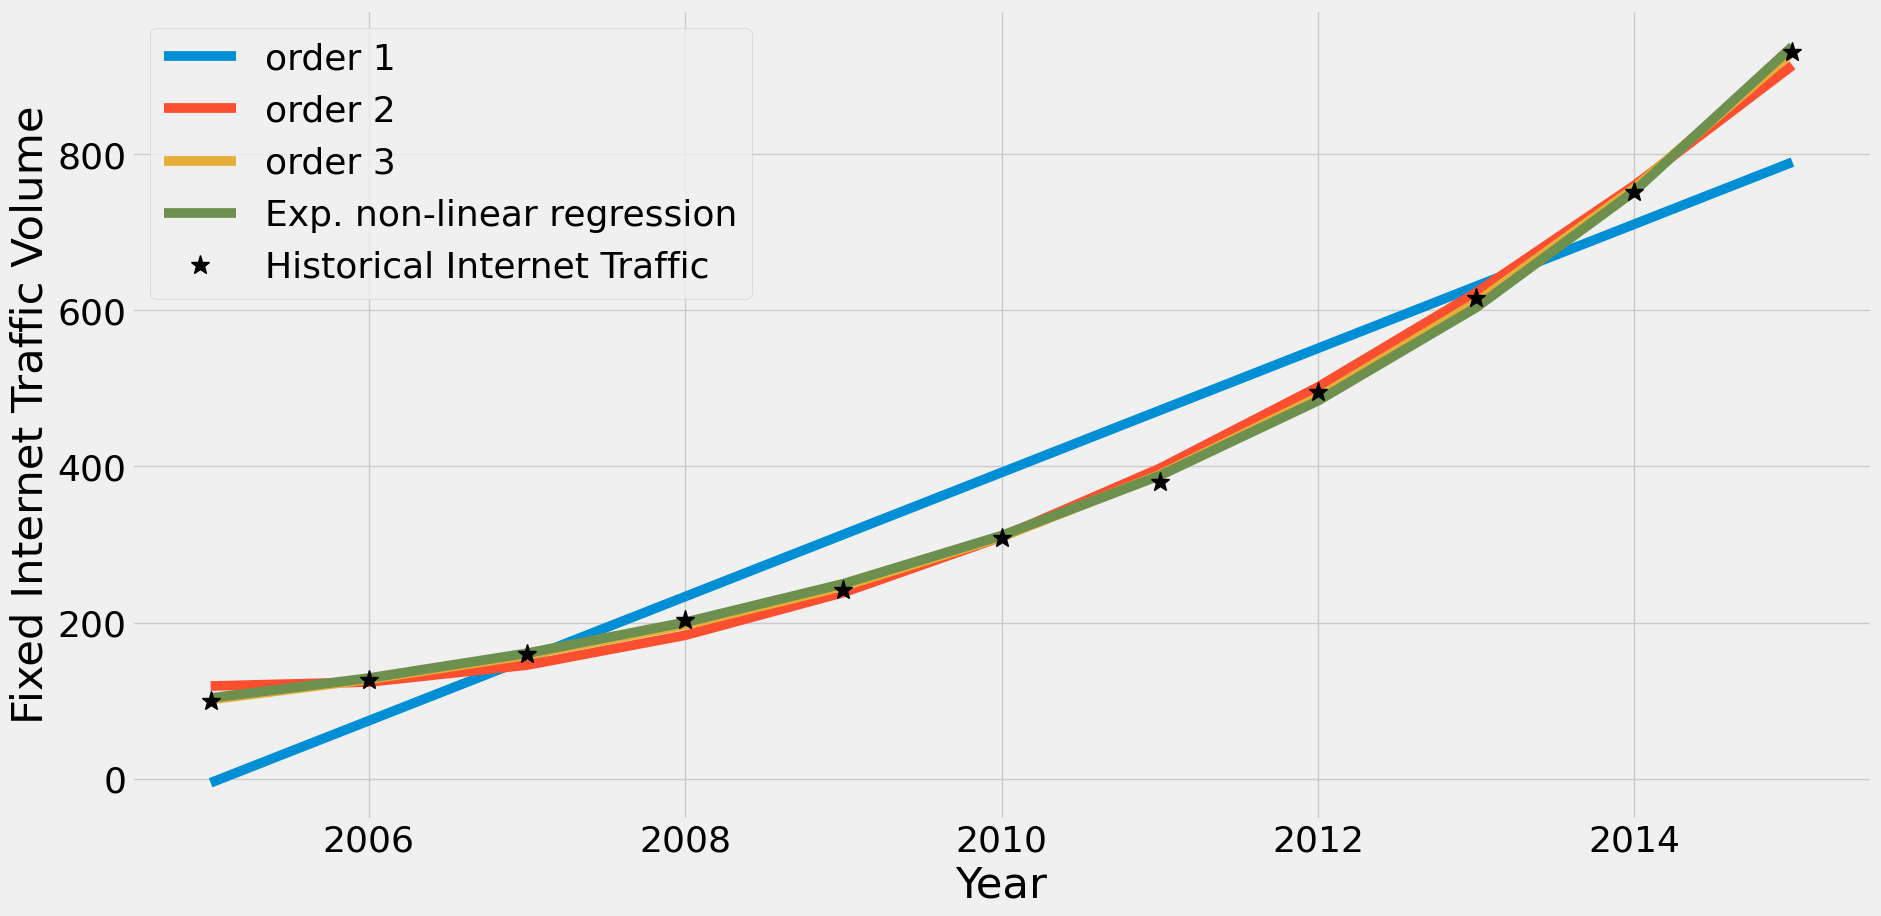

In [26]:
# Code cell 12
plt.figure(figsize = (20,10))

# Visualize polynomial models fit
for model in models[0:-1]:
    
    x = df_hist.year.values      
    y = df_hist.traffic.values   
    plt.plot(x, model(x), label = 'order ' + str(len(model)), linewidth = 7)

# Visualize exponenetial model fit
x = np.arange(2016-2005)    # the regressor is not the year in itself, but the number of years from 2005
plt.plot(df_hist.year.values, my_exp_func(x, *models[-1]), label = 'Exp. non-linear regression', linewidth = 7)

plt.plot(df_hist.year, df_hist.traffic, '*k', markersize = 14, label='Historical Internet Traffic')
plt.legend(loc = 'upper left')

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')
plt.show()


For the selected range of year, the difference between a 2nd or 3rd order polynomial regression model and the exponential one is negligible. Let's visualize the actual errors.

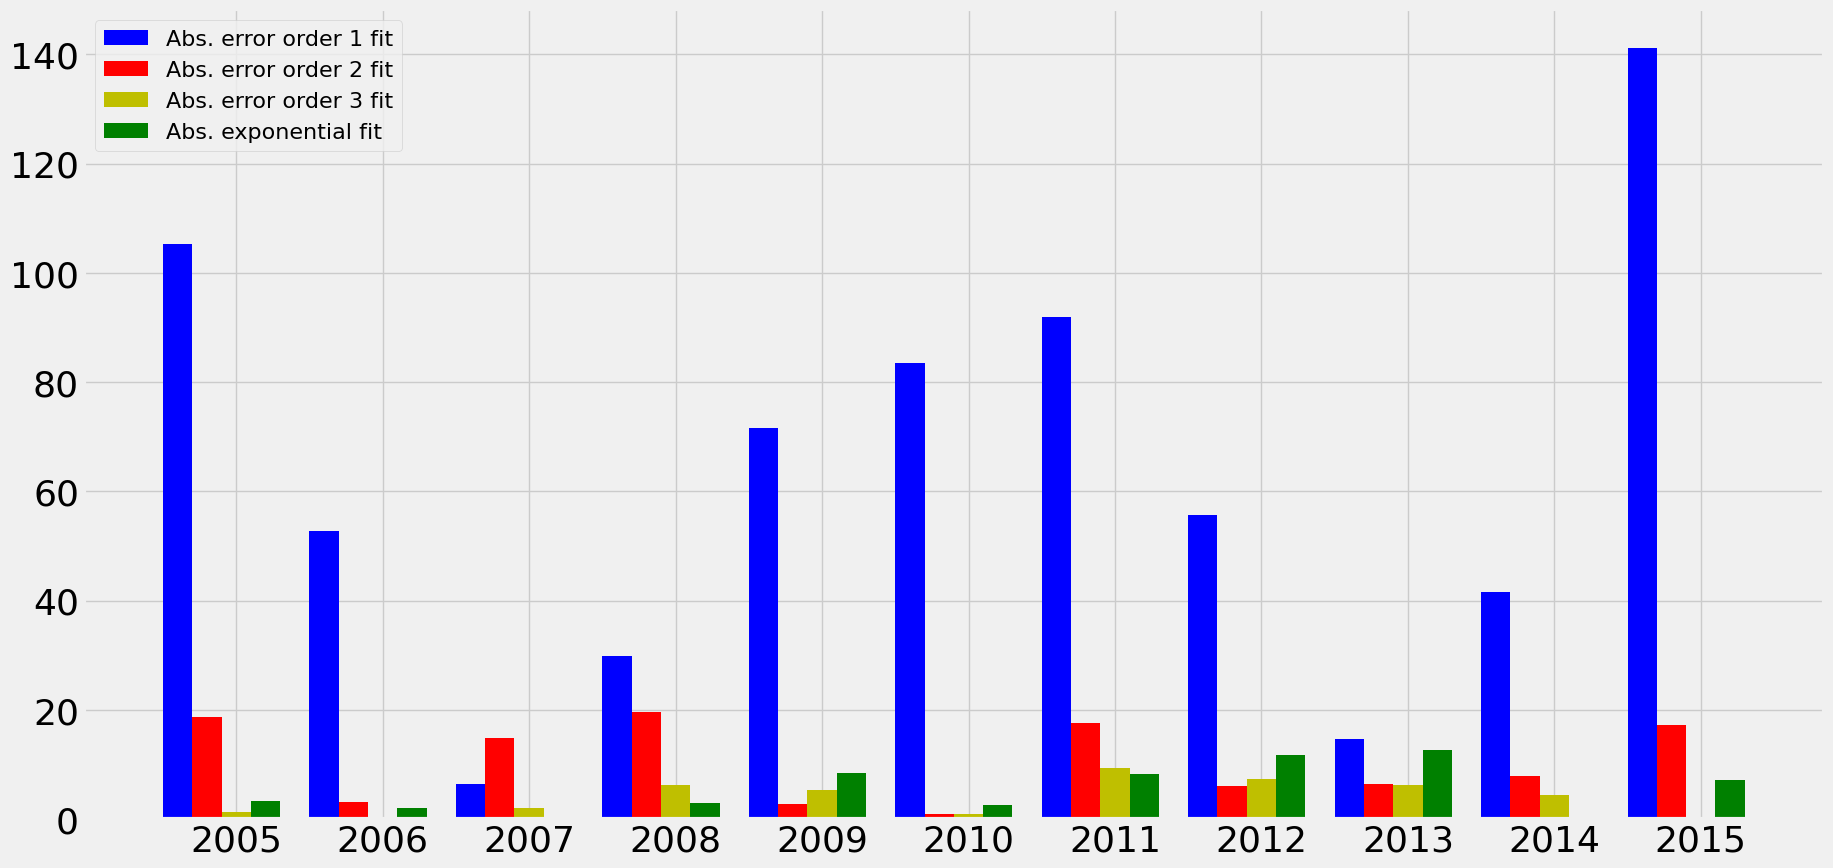

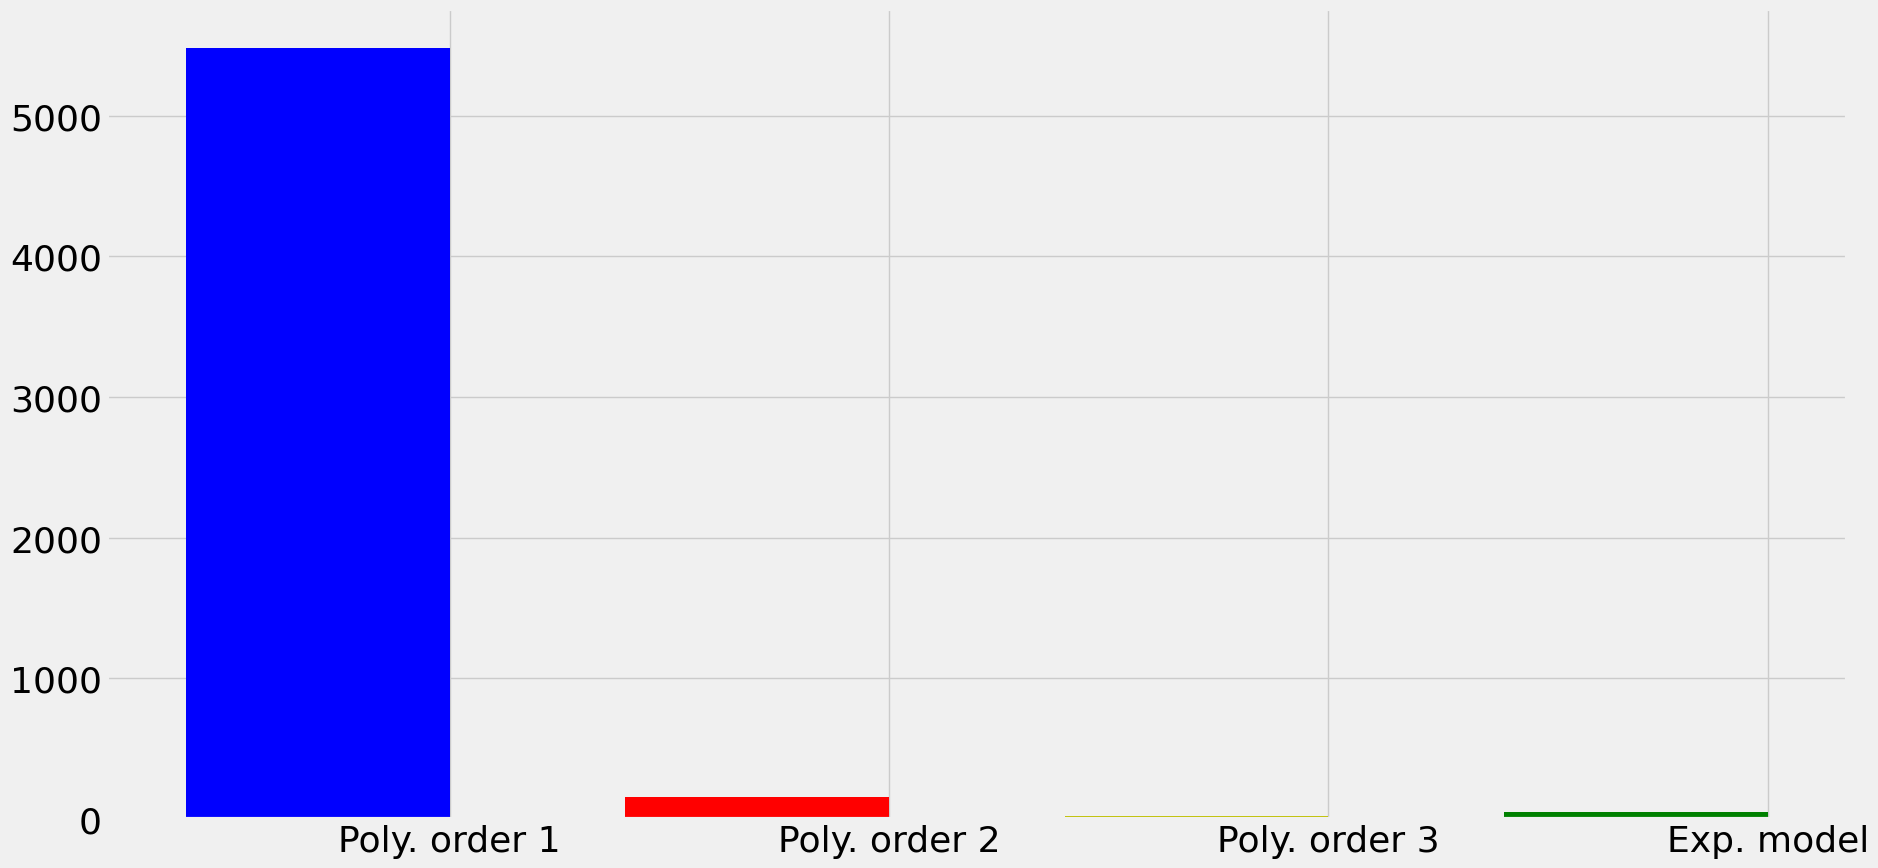

In [30]:
# Code cell 13
# Visualize fit error for each year

x = df_hist.year
width = 0.2   #size of the bar

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

p1 = ax.bar( x, errors_hist[0], width, color = 'b', label = 'Abs. error order 1 fit')
p2 = ax.bar( x + width, errors_hist[1], width, color = 'r', label = 'Abs. error order 2 fit')
p3 = ax.bar( x + 2*width, errors_hist[2], width, color = 'y', label = 'Abs. error order 3 fit')
p4 = ax.bar( x + 3*width, errors_hist[3], width, color = 'g', label = 'Abs. exponential fit')

# "Prettyfy" the bar graph
ax.set_xticks(x+2*width)
ax.set_xticklabels(x)
plt.legend(loc = 'upper left', fontsize =16)
plt.show()

#Visualise MSE for each model
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

x = np.array([0,1,2,3])
width = .6   #size of the bar

p1 = ax.bar( x[0], mse_hist[0], width, color = 'b', label = 'pred. error order 1 fit')
p2 = ax.bar( x[1], mse_hist[1], width, color = 'r', label = 'pred. error order 2 fit')
p3 = ax.bar( x[2], mse_hist[2], width, color = 'y', label = 'pred. error order 3 fit')
p4 = ax.bar( x[3], mse_hist[3], width, color = 'g', label = 'pred. exponential fit')

ax.set_xticks(x+width/2)
ax.set_xticklabels(['Poly. order 1', 'Poly. order 2', 'Poly. order 3', 'Exp. model' ], rotation=0)
plt.show()

From the last plot, it seems that a third order polynomial, while not being the *true* model, fits better the traffic measurements in the observed range. But how well will this model generalize outside of this range (*e.g.*, if we want to use this to make **predictions** about the future Internet traffic volume) ?

## Part 8: Use Regression Model to Predict Future Values
In this part, you will look at the projected values for the fixed Internet traffic volume. Assuming the same growth rate of the period 2005-2015, data is generated and stored in the dataset `internet_traffic_proj.csv`. Load its content in a `DataFrame` named `df_proj` and visualize the first few rows.
#### Step 1: Load and visualize projected Internet traffic volume.

In [31]:
# Code cell 14
filename = './Data/internet_traffic_proj.csv'
df_proj = pd.read_csv(filename)
df_proj.head()

,traffic,year
0,931.200929,2015
1,1266.783122,2016
2,1427.662376,2017
3,1749.671543,2018
4,2281.869542,2019


#### Step 2: Compare linear and nonlinear model prediction errors.

Merge the `df_proj` and the `df_hist` `DataFrame`s, and visualize how the previously fitted regression model behaves in predicting future values.

In [32]:
# Code cell 15
df = pd.concat([df_hist, df_proj]).reset_index()
df.drop('index', axis=1, inplace=True)
df = df.drop_duplicates() #The 2015 value is found in both the df_hist and df_proj df
df.head(20)

,traffic,year
0,100.000000,2005
1,126.933755,2006
2,160.303757,2007
3,203.390603,2008
4,241.292566,2009
5,308.791823,2010
6,379.980659,2011
7,495.840568,2012
8,616.207252,2013
9,752.103483,2014


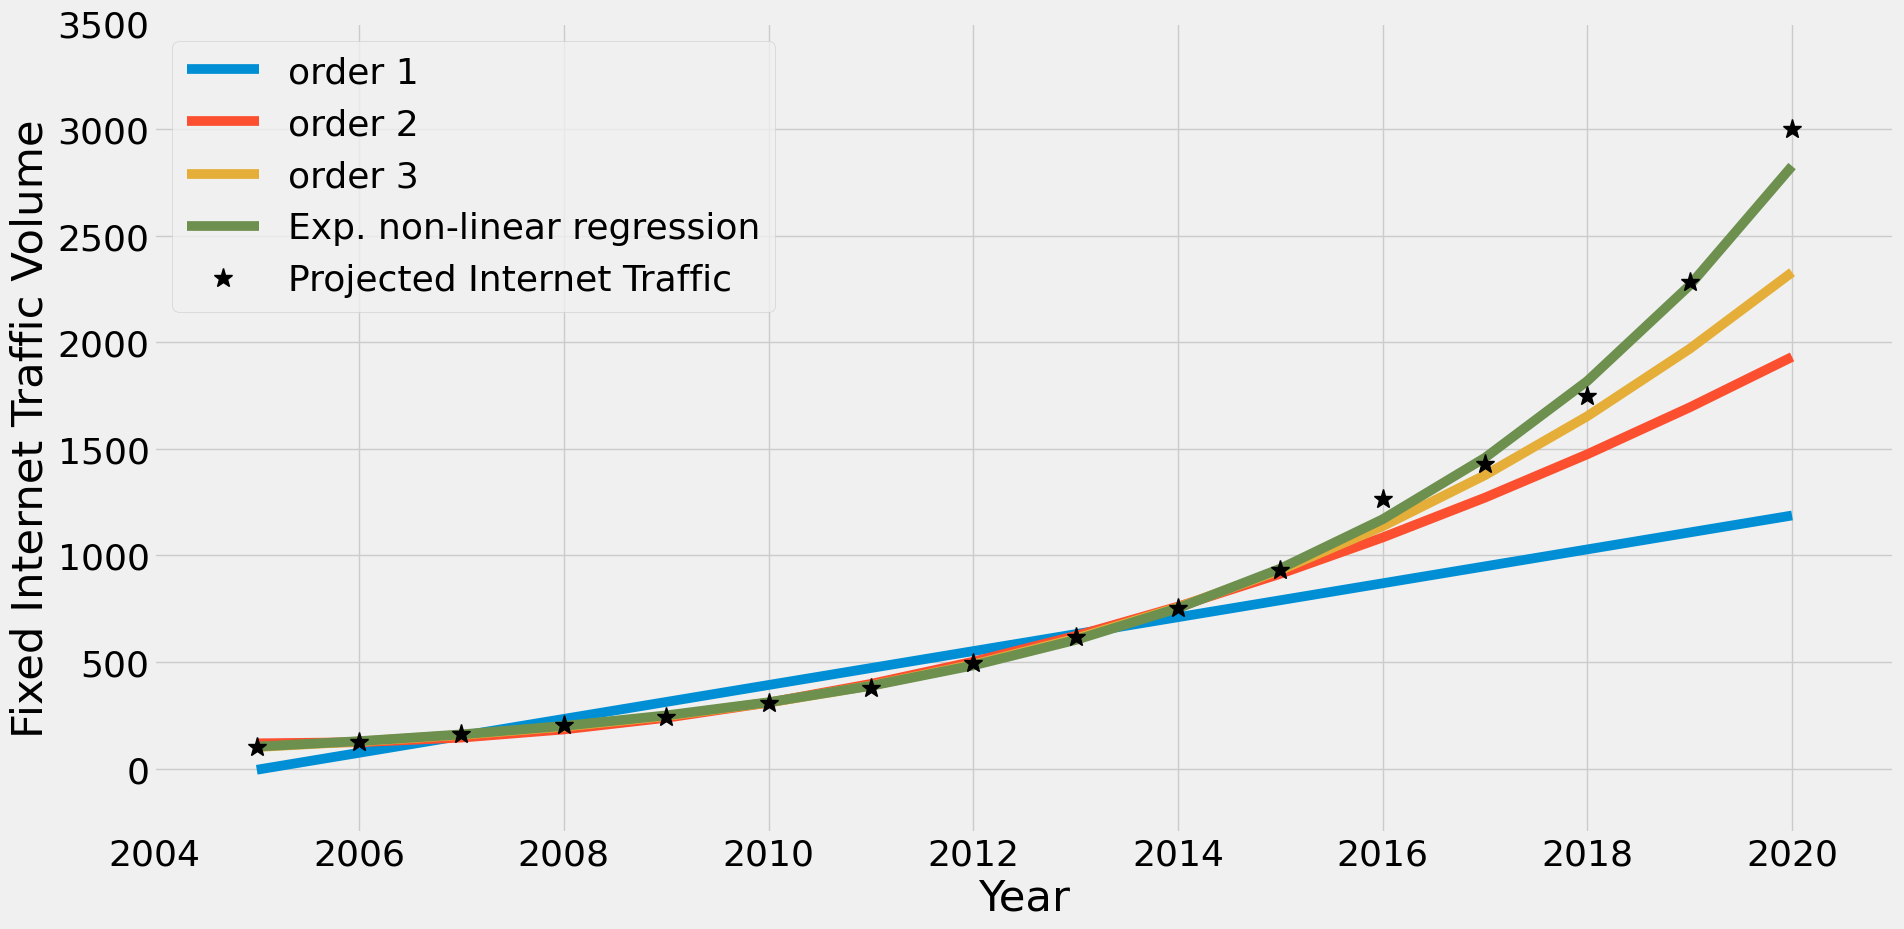

In [33]:
# Code cell 16
plt.figure(figsize = (20,10))

errors_all = []
mse_all = []

for model in models[0:-1]:
    
    # Visualize polynomial model fit
    x = df.year.values      
    y = df.traffic.values   
    plt.plot(x, model(x), label = 'order ' + str(len(model)), linewidth = 7)
    
    # error and mse for polynomial models
    pred_y = model(x)
    e = np.abs(y - pred_y)
    errors_all.append(e)   #Store the absolute errors
    mse_all.append(np.sum(e**2)/len(df)) # Store the mse
    
    
# Visualize exponential model fit
x = np.arange(2021-2005)    # the regressor is not the year in itself, but the number of years from 2005
pred_y = my_exp_func(x, *models[-1])
plt.plot(df.year.values, pred_y, label = 'Exp. non-linear regression', linewidth = 7)

# errors and mse for exponential model
e = np.abs(y - pred_y)
errors_all.append(e)   #Store the absolute errors
mse_all.append(np.sum(e**2)/len(df)) # Store the mse

plt.plot(df.year, df.traffic, '*k', markersize = 14, label='Projected Internet Traffic')
plt.legend(loc = 'upper left')

# Add axis labels
plt.xlabel('Year')
plt.ylabel('Fixed Internet Traffic Volume')
plt.axis([2004,2021, -300, 3500])
plt.show()

What can you conclude about the 3rd order polynomial model and exponential model?

Based on the visualization of the fitted regression models, we can conclude the following:

1. The 3rd order polynomial model fits the historical data well within the observed range of years (2005-2015). It captures the general trend of the fixed Internet traffic volume and provides a good approximation.

2. The exponential model also fits the historical data well within the observed range of years (2005-2015). It captures the exponential growth pattern of the fixed Internet traffic volume.

3. When predicting future values beyond the observed range, both models show some deviation from the actual projected values. However, the 3rd order polynomial model tends to overestimate the future values, while the exponential model tends to underestimate them.

4. Overall, the choice between the 3rd order polynomial model and the exponential model depends on the specific requirements and assumptions of the analysis. The polynomial model may be more suitable for capturing complex non-linear relationships, while the exponential model may be more appropriate for modeling exponential growth patterns.

<font size='0.5'>&copy; 2017 Cisco and/or its affiliates. All rights reserved. This document is Cisco Public.<font>